In [1]:
#pip install https://github.com/khramts/assocplots/archive/master.zip

In [8]:
%matplotlib inline

#Here we set the dimensions for the figures in this notebook
import matplotlib as mpl
mpl.rcParams['figure.dpi']=150
mpl.rcParams['savefig.dpi']=150
mpl.rcParams['figure.figsize']=7.375, 3.375

In [9]:
import numpy as np
hip_all_snp=np.genfromtxt('twas_all.txt', dtype=None)
hip_PDX=np.genfromtxt('twas_PDX.txt', dtype=None)

<ipython-input-9-bef1afc950de>:2: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  hip_all_snp=np.genfromtxt('twas_all.txt', dtype=None)
<ipython-input-9-bef1afc950de>:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  hip_PDX=np.genfromtxt('twas_PDX.txt', dtype=None)


In [10]:
hip_all_snp

array([(b'ENSG00000150457.8', b'LATS2',  4.03859009e+00, 5.37734400e-05),
       (b'ENSG00000076864.19', b'RAP1GAP', -3.74989512e+00, 1.76908543e-04),
       (b'ENSG00000089060.11', b'SLC8B1',  3.41649872e+00, 6.34319627e-04),
       ...,
       (b'ENSG00000186529.15', b'CYP4F3', -7.92951194e-05, 9.99936732e-01),
       (b'ENSG00000185122.10', b'HSF1',  5.01546322e-05, 9.99959982e-01),
       (b'ENSG00000134627.11', b'PIWIL4', -7.71182723e-06, 9.99993847e-01)],
      dtype=[('f0', 'S18'), ('f1', 'S19'), ('f2', '<f8'), ('f3', '<f8')])

In [11]:
hip_PDX

array([(b'ENSG00000144320.13', b'LNPK', -3.09252568e+00, 0.00198461),
       (b'ENSG00000150337.13', b'FCGR1A', -2.87433914e+00, 0.00404874),
       (b'ENSG00000227403.1', b'LINC01806', -2.87429540e+00, 0.0040493 ),
       ...,
       (b'ENSG00000253497.1', b'IGKV1-13',  1.12622851e-03, 0.9991014 ),
       (b'ENSG00000234741.7', b'GAS5',  8.30307580e-04, 0.99933751),
       (b'ENSG00000213045.3', b'RP11-532L16.1', -4.64510867e-05, 0.99996294)],
      dtype=[('f0', 'S18'), ('f1', 'S14'), ('f2', '<f8'), ('f3', '<f8')])

In [4]:
import numpy as np

import numpy as np
import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt
import re

def sorted_nicely( l ):
    """ Sort the given iterable in the way that humans expect."""
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    return sorted(l, key = alphanum_key)

def manhattan(p1, pos1, chr1, label1,
               p2=None, pos2=None, chr2=None, label2=None,
               plot_type='single',
               chrs_plot=None, chrs_names=None,
               cut = 2,
               colors = ['k', '0.5'],
               title='Title',
               xlabel='chromosome',
               ylabel='-log10(p-value)',
               top1 = 0,
               top2 = 0,
               lines = [10, 15],
               lines_colors = ['g', 'r'],
               lines_styles = ['-', '--'],
               lines_widths = [1,1],
               zoom = None,
               scaling = '-log10'):
    '''
    Static Manhattan plot
    :param p1: p-values for the top panel
    :param pos1: positions
    :param chr1: chromosomes numbers
    :param label1: label
    :param p2: p-values for the bottom panel
    :param pos2: positions
    :param chr2: chromosomes numbers
    :param label2: label
    :param type: Can be 'single', 'double' or 'inverted'
    :param chrs_plot: list of chromosomes that should be plotted. If empty [] all chromosomes will be plotted
    :param cut: lower cut (default 2)
    :param colors: sequence of colors (default: black/gray)
    :param title: defines the title of the plot
    :param xlabel: defines the xlabel of the plot
    :param ylabel: defines the ylabel of the plot
    :param top: Defines the upper limit of the plot. If 0, it is detected automatically.
    :param lines: Horizontal lines to plot.
    :param lines_colors: Colors for the horizontal lines.
    :param lines_styles: Styles for the horizontal lines.
    :param lines_widths: Widths for the horizontal lines.
    :param zoom: [chromosome, position, range] Zooms into a region.
    :param scaling: '-log10' or 'none' (default -log10)
    :return:
    '''

    # Setting things up
    shift=np.array([0.0])
    plt.clf()

    # If chrs_plot is empty, we need to generate a list of chromosomes
    if chrs_plot is None:
        chrs_list = np.unique(chr1)
        if isinstance(chrs_list[0], str):
            chrs_list = sorted_nicely(chrs_list)
        else:
            chrs_list.sort()
    else:
        chrs_list = chrs_plot


    # If chrs_names is empty, we need to generate a list of names for chromosomes
    if chrs_names is None:
        chrs_names = [str(chrs_list[i]) for i in range(len(chrs_list))]

    plot_positions = False
    if len(chrs_list) == 1:
        plot_positions = True


    for ii, i in enumerate(chrs_list):
        if plot_type != 'single':
            ax1 = plt.subplot(2,1,1)
        else:
            plt.subplot(1,1,1)
        # print(i)
        filt = np.where(chr1==i)[0]
        x = shift[-1]+pos1[filt]
        if scaling=='-log10':
            y = -np.log10(p1[filt])
        elif scaling=='none':
            y = p1[filt]
        else:
            raise ValueError('Wrong "scaling" mode. Choose between "-log10" and "none"')
        plt.plot(x[y>cut], y[y>cut], '.', color=colors[ii % len(colors)])
        shift_f = np.max(x)

        if zoom is not None:
            if zoom[0] == i:
                zoom_shift = zoom[1] + shift[-1]

        if plot_type != 'single':
            plt.subplot(2,1,2)#, sharex=ax1)
            filt = np.where(chr2==i)[0]
            x = shift[-1]+pos2[filt]
            if scaling=='-log10':
                y = -np.log10(p2[filt])
            elif scaling=='none':
                y = p2[filt]
            else:
                raise ValueError('Wrong "scaling" mode. Choose between "-log10" and "none"')
            plt.plot(x[y>cut], y[y>cut], '.', color=colors[ii % len(colors)])
            shift_m = np.max(x)
        else:
            shift_m = 0

        shift = np.append(shift, np.max([shift_f, shift_m]))

        if plot_type != 'single':
            plt.subplot(2,1,1)
        else:
            plt.subplot(1,1,1)
        plt.plot([shift[-1], shift[-1]], [0, 1000], '-k', lw=0.5, color='lightgray')
        plt.xlim([0, shift[-1]])

        if plot_type != 'single':
            plt.subplot(2,1,2)
            plt.plot([shift[-1], shift[-1]], [0, 1000], '-k', lw=0.5, color='lightgray')
            plt.xlim([0, shift[-1]])
        # print(shift)

    # Defining top boundary of a plot
    if top1 == 0:
        if plot_type != 'single':
            if scaling == '-log10':
                top1 = np.ceil(np.max([np.max(-np.log10(p1)), np.max(-np.log10(p2))]))
            elif scaling == 'none':
                top1 = np.ceil(np.max([np.max(p1), np.max(p2)]))
            else:
                raise ValueError('Wrong "scaling" mode. Choose between "-log10" and "none"')
        else:
            if scaling == '-log10':
                top1 = np.ceil(np.max(-np.log10(p1)))
            elif scaling == 'none':
                top1 = np.ceil(np.max(p1))
            else:
                raise ValueError('Wrong "scaling" mode. Choose between "-log10" and "none"')


    if top2 == 0:
        if plot_type != 'single':
            top2 = top1

    # Setting up the position of labels:
    shift_label = shift[-1]
    shift = (shift[1:]+shift[:-1])/2.
    labels = chrs_names

    # Plotting horizontal lines
    for i, y in enumerate(lines):
        if plot_type != 'single':
            plt.subplot(2,1,1)
            plt.axhline(y=y, color=lines_colors[i], linestyle=lines_styles[i], linewidth=lines_widths[i])
            plt.subplot(2,1,2)
            plt.axhline(y=y, color=lines_colors[i], linestyle=lines_styles[i], linewidth=lines_widths[i])
        else:
            plt.subplot(1,1,1)
            plt.axhline(y=y, color=lines_colors[i], linestyle=lines_styles[i], linewidth=lines_widths[i])

    if plot_type != 'single':
        plt.subplot(2,1,1)
        if not plot_positions:
            plt.xticks(shift, labels)
        plt.ylim([cut+0.05, top1])
    else:
        plt.subplot(1,1,1)
        plt.ylim([cut, top1])
    plt.title(title)
    if plot_type != 'single':
        plt.setp(plt.gca().get_xticklabels(), visible=False)
        if not plot_positions:
            plt.xticks(shift)
    else:
        if not plot_positions:
            plt.xticks(shift, labels)

    plt.text(shift_label*0.95,top1*0.95,label1,#bbox=dict(boxstyle="round", fc="1.0"),
            verticalalignment='top', horizontalalignment='right')

    if plot_type != 'single':
        plt.subplot(2,1,2)
        plt.ylim([cut, top2])
        if plot_type == 'inverted':
            plt.gca().invert_yaxis()
        if not plot_positions:
            plt.xticks(shift, labels)
        if plot_type == 'inverted':
            plt.text(shift_label*0.95,top2*0.95,label2,#bbox=dict(boxstyle="round", fc="1.0"),
                verticalalignment='bottom', horizontalalignment='right')
        else:
            plt.text(shift_label*0.95,top2*0.95,label2,#bbox=dict(boxstyle="round", fc="1.0"),
                verticalalignment='top', horizontalalignment='right')
        plt.ylabel(ylabel)
        plt.gca().yaxis.set_label_coords(-0.065,1.)
        plt.xlabel(xlabel)
        # plt.tight_layout(hspace=0.001)
        plt.subplots_adjust(hspace=0.00)
    else:
        plt.ylabel(ylabel)
        plt.xlabel(xlabel)

    if zoom is not None:
        if plot_type != 'single':
            plt.subplot(2,1,1)
            plt.xlim([zoom_shift-zoom[2], zoom_shift+zoom[2]])
            plt.subplot(2,1,2)
            plt.xlim([zoom_shift-zoom[2], zoom_shift+zoom[2]])
        else:
            plt.subplot(1,1,1)
            plt.xlim([zoom_shift-zoom[2], zoom_shift+zoom[2]])

    return 0

# def manhattan1(p1, pos1, chr1, label1, info1=[], info1_bins=[], info_colors=[], cut = 2, colors = ['k', '0.5'], title='Title', top = 0):
#     '''
#     Static Manhattan plot
#     :param p1: p-values for the top panel
#     :param pos1: positions
#     :param chr1: chromosomes numbers
#     :param label1: label
#     :param cut: lower cut (default 2)
#     :param colors: sequence of colors (default: black/gray)
#     :return:
#     '''
#     import matplotlib as mpl
#     mpl.rcParams['axes.color_cycle'] = ['k', '0.5']
#     shift=np.array([0.0])
#     plt.clf()
#     for i in range(1,23):
#         print(i)
#         filt = (chr1==i)
#         x = shift[-1]+pos1[filt]
#         y = -np.log10(p1[filt])
#         # print(filt.sum(), x[:5])
#         if len(info1) == 0:
#             plt.plot(x[y>cut], y[y>cut], '.')
#         else:
#             for k in range(len(info1_bins)-1):
#                 filt2 = (info1[filt] > info1_bins[k]) & (info1[filt] <= info1_bins[k+1])
#                 # print(filt.sum())
#                 plt.plot(x[filt2 & (y > cut)], y[filt2 & (y > cut)], '.', alpha=0.7, color=info_colors[k])
#         shift_f = np.max(x)
#         shift = np.append(shift, shift_f)
#         plt.plot([shift[-1], shift[-1]], [0, 10], '-k', lw=0.5, color='lightgray')
#         plt.xlim([0, shift[-1]])
#     if top == 0:
#         top = np.ceil(np.max([np.max(-np.log10(p1)), np.max(-np.log10(p2))]))
#     shift = (shift[1:]+shift[:-1])/2.
#     plt.ylim([cut, top])
#     plt.title(title)
#     # plt.setp(plt.gca().get_xticklabels(), visible=False)
#     plt.xticks(shift)
#     # plt.text(shift[12],8,label1,bbox=dict(boxstyle="round", fc="1.0"))
#     labels = np.arange(1,23).astype(str)
#     labels[-2] = ''
#     labels[-4] = ''
#     labels[-6] = ''
#     labels[-8] = ''
#     labels[-10] = ''
#     plt.xticks(shift, labels)
#     plt.ylabel('-log10(p-value)')
#     plt.xlabel('chromosome')
#     # plt.tight_layout(hspace=0.001)
#     # plt.subplots_adjust(hspace=0.001)


def reduce_data(data, top_snps=1000):
    '''
    Function reduces data for interactive plot
    :param data: list of datasets
    :param top_snps: number of snps to include
    :return: combined table
    '''
    pass

In [5]:
chrs = [str(i) for i in range(1,23)]
chrs_names = np.array([str(i) for i in range(1,23)])
chrs_names[1::2] = ''

cmap = plt.get_cmap('viridis')
colors = [cmap(i) for i in [0.0,0.33,0.67,0.90]]

# Alternatively you can input colors by hand
from matplotlib.colors import hex2color
colors = ['#1b9e77', "#d95f02", '#7570b3', '#e7298a']
# Converting from HEX into RGB
colors = [hex2color(colors[i]) for i in range(len(colors))]

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.mstats import mquantiles
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import beta
from scipy.stats import linregress
from scipy.stats import chi2

def get_lambda(p, definition = 'median'):
    '''
    Evaluates Lambda value
    :param p: distribution of p-values
    :param definition: definition of lambda
    :return:
    '''
    if definition == 'median':
        pm = np.median(p)
        Chi = chi2.ppf(1. - pm, 1)
        return Chi / chi2.ppf(0.5,1)
    else:
        raise Exception("Only 'median' definition of lambda is implemented at this moment.")


def qqplot(data, labels, n_quantiles=100, alpha=0.0, error_type='theoretical', distribution = 'binomial', log10conv=True, color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"], fill_dens=[0.1, 0.1, 0.1], type = 'uniform', title='title'):
    '''
    Function for plotting Quantile Quantile (QQ) plots with confidence interval (CI)
    :param data: NumPy 1D array with data
    :param labels:
    :param type: type of the plot
    :param n_quantiles: number of quntiles to plot
    :param alpha: confidence interval
    :param distribution: beta/normal/binomial -- type of the error estimation. Most common in the literature is 'beta'.
    :param log10conv: conversion to -log10(p) for the figure
    :return: nothing
    '''
    xmax = 0
    ymax = 0
    if type == 'uniform':
        # we expect distribution from 0 to 1
        for j in range(len(data)):
            # define quantiles positions:
            q_pos = np.concatenate([np.arange(99.)/len(data[j]), np.logspace(-np.log10(len(data[j]))+2, 0, n_quantiles)])
            # define quantiles in data
            q_data = mquantiles(data[j], prob=q_pos, alphap=0, betap=1, limit=(0, 1)) # linear interpolation
            # define theoretical predictions
            q_th = q_pos.copy()
            # evaluate errors
            q_err = np.zeros([len(q_pos),2])
            if np.sum(alpha) > 0:
                for i in range(0, len(q_pos)):
                    if distribution == 'beta':
                        q_err[i, :] = beta.interval(alpha, len(data[j])*q_pos[i], len(data[j]) - len(data[j])*q_pos[i])
                    elif distribution == 'binomial':
                        q_err[i, :] = binom.interval(alpha=alpha, n=len(data[j]), p=q_pos[i])
                    elif distribution == 'normal':
                        q_err[i, :] = norm.interval(alpha, len(data[j])*q_pos[i], np.sqrt(len(data[j])*q_pos[i]*(1.-q_pos[i])))
                    else:
                        print('Distribution is not defined!')
                q_err[i, q_err[i, :] < 0] = 1e-15
                if (distribution == 'binomial') | (distribution == 'normal'):
                    q_err /= 1.0*len(data[j])
                    for i in range(0, 100):
                        q_err[i,:] += 1e-15
            # print(q_err[100:, :])
            slope, intercept, r_value, p_value, std_err = linregress(q_th, q_data)
            # print(labels[j], ' -- Slope: ', slope, " R-squared:", r_value**2)
            
            plt.plot(-np.log10(q_th[n_quantiles-1:]), -np.log10(q_data[n_quantiles-1:]), '.', color=color[j],markersize=10)
            plt.plot(-np.log10(q_th[:n_quantiles]), -np.log10(q_data[:n_quantiles]), '.', color=color[j], label=labels[j],markersize=10)
            xmax = np.max([xmax, - np.log10(q_th[1])])
            ymax = np.max([ymax, - np.log10(q_data[0])])
            # print(- np.log10(q_th[:]))
            if np.sum(alpha)>0:
                if error_type=='experimental':
                    plt.fill_between(-np.log10(q_th), -np.log10(q_data/q_th*q_err[:,0]), -np.log10(q_data/q_th*q_err[:,1]), color=color[j], alpha=fill_dens[j], label='%1.3f CI'%alpha)
        if np.sum(alpha)>0:
            if error_type=='theoretical':
                plt.fill_between(-np.log10(q_th), -np.log10(q_err[:,0]), -np.log10(q_err[:,1]), color=color[j], alpha=fill_dens[j], label='%1.3f CI'%alpha)
    plt.legend(loc='best',fontsize=14)
    plt.xlabel('-log10(Expected)',fontsize=15)
    plt.ylabel('-log10(Observed)',fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.plot([0, 100], [0, 100],'--k')
    plt.xlim([0, np.ceil(xmax)])
    plt.ylim([0, np.ceil(ymax*1.05)])
    plt.title(title)
    plt.tight_layout()
    # return q_data, q_th, q_err

<ipython-input-18-b7ffb33b90ae>:70: RuntimeWarning: divide by zero encountered in log10
  plt.plot(-np.log10(q_th[:n_quantiles]), -np.log10(q_data[:n_quantiles]), '.', color=color[j], label=labels[j],markersize=10)


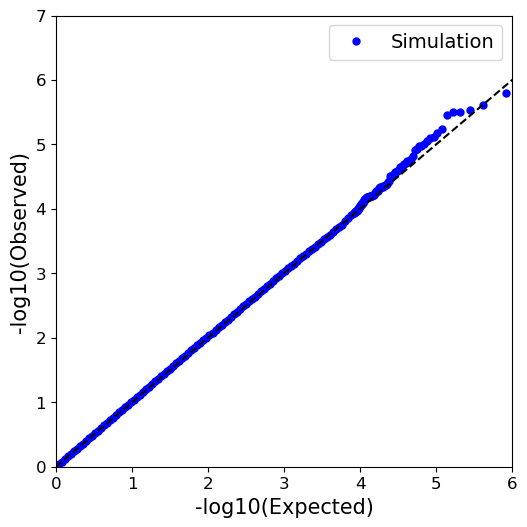

In [24]:
# This is an example of a classic QQ plot with 95% confidence interval plotted for the null distribution

mpl.rcParams['figure.dpi']=100
mpl.rcParams['savefig.dpi']=100
mpl.rcParams['figure.figsize']=5.375, 5.375

qqplot([hip_all_snp['f3']], 
       ["Simulations"], 
       color=["b"], 
       fill_dens=[0.2], 
       error_type='theoretical', 
       distribution='beta',
       title='')


plt.savefig('qqplot_simulation.png', dpi=600)
plt.savefig('qqplot_simulation.pdf')

<ipython-input-6-b7ffb33b90ae>:70: RuntimeWarning: divide by zero encountered in log10
  plt.plot(-np.log10(q_th[:n_quantiles]), -np.log10(q_data[:n_quantiles]), '.', color=color[j], label=labels[j],markersize=10)


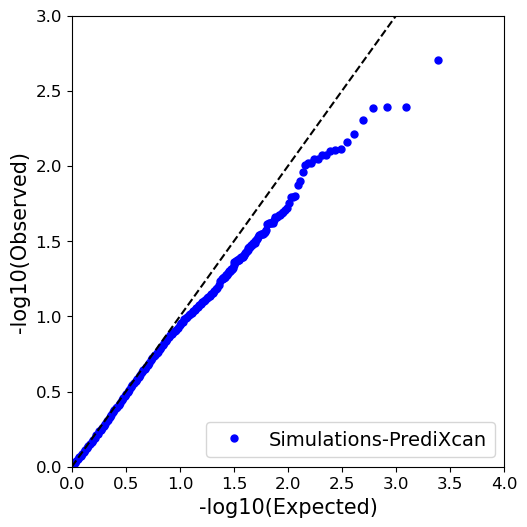

In [12]:
# This is an example of a classic QQ plot with 95% confidence interval plotted for the null distribution

mpl.rcParams['figure.dpi']=100
mpl.rcParams['savefig.dpi']=100
mpl.rcParams['figure.figsize']=5.375, 5.375

qqplot([hip_PDX['f3']], 
       ["Simulations-PrediXcan"], 
       color=["b"], 
       fill_dens=[0.2], 
       error_type='theoretical', 
       distribution='beta',
       title='')


plt.savefig('qqplot_PDX.png', dpi=600)
plt.savefig('qqplot_PDX.pdf')

In [19]:
qqplot( 
       hip_all_snp['f3'],
       ['Simulations'],
       ##color=["#808080", "#8c564b", "#9467bd", "#1f77b4", "#2ca02c","#ff7f0e","#d62728"], 
       color=["#d62728"],
       fill_dens=[0.3],
       alpha=0.0,
       error_type='experimental', 
       distribution='beta',
       title='')

plt.savefig('qqplot_simulation.png', dpi=600)
plt.savefig('qqplot_simulation.pdf')

TypeError: object of type 'numpy.float64' has no len()